In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel("C:\\Users\\moadh\\OneDrive - ensam.eu\\Moad\\3A\\ENSAM\\Data boost\\tp1\\factory_process_CLA_raw.xlsx")
data = df.copy()

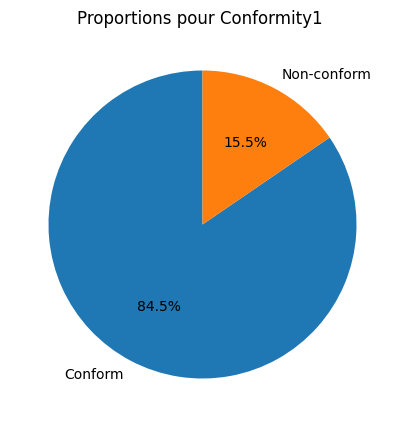

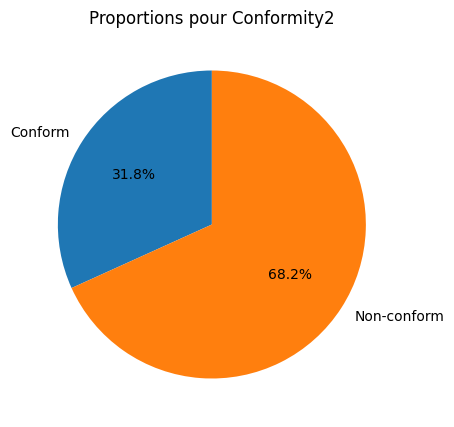

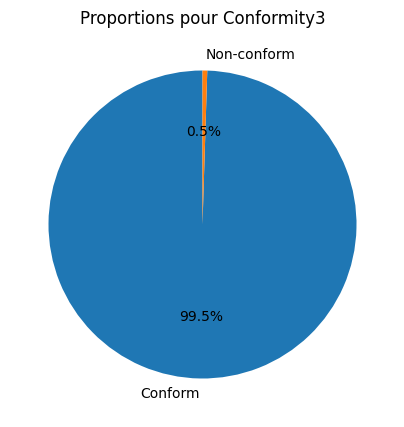

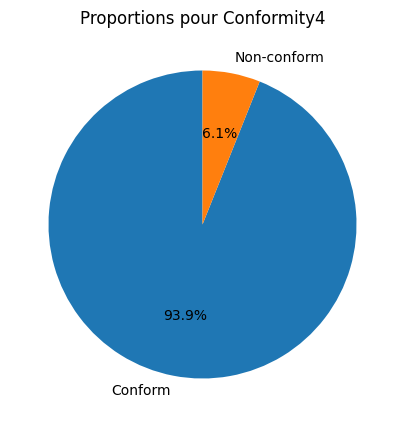

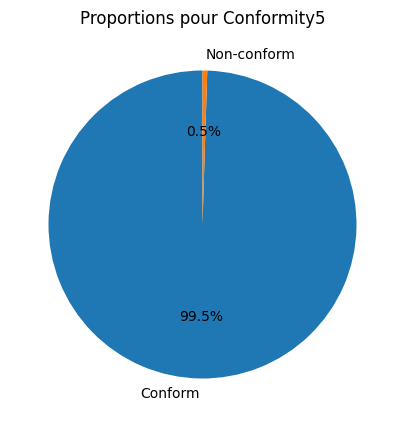

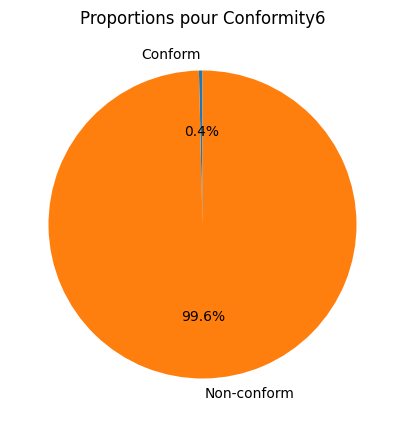

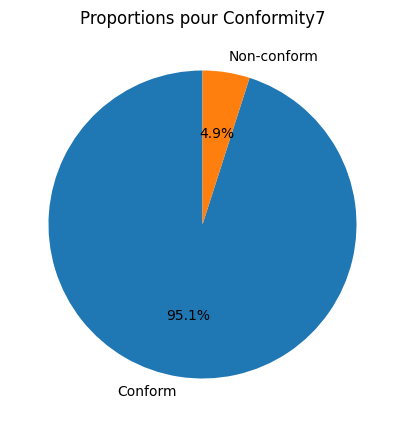

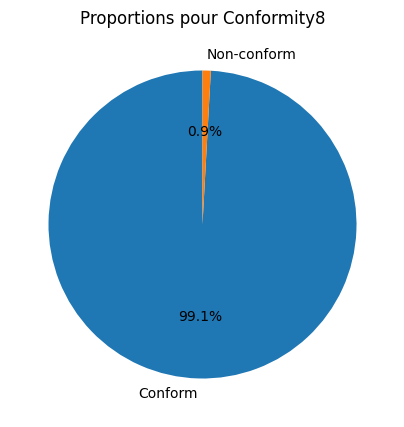

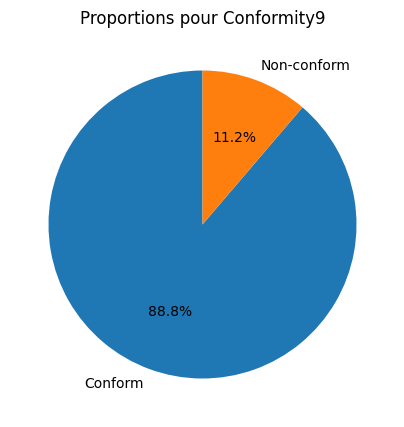

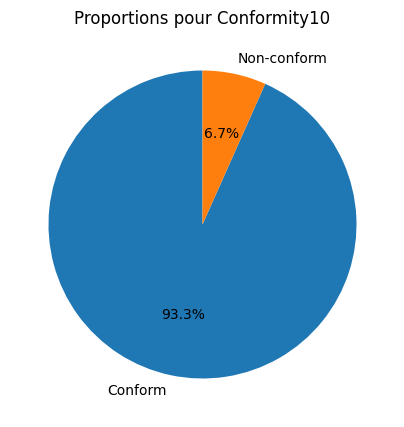

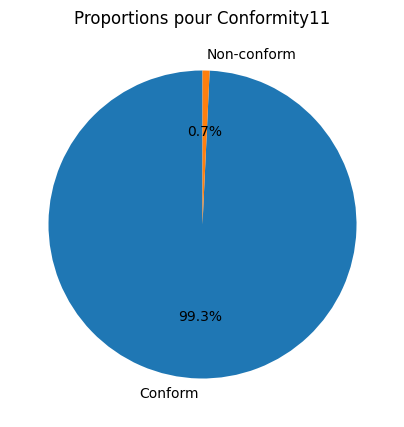

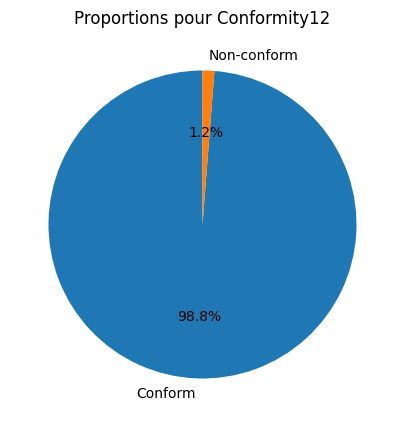

In [464]:
# Identifier les variables quantitatives (numériques)
numerical = data.select_dtypes(exclude="object").columns

# Identifier les variables qualitatives (catégorielles)
categorical = data.select_dtypes(include="object").columns

proportion = {}
for col in categorical:
    proportion[col] = data[col].value_counts(normalize=True)

proportion = pd.DataFrame(proportion)
proportion

# Affichage des proportions avec des pie charts
for col in categorical:
    plt.figure(figsize=(5,5))
    plt.pie(proportion[col], labels=proportion[col].index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Proportions pour {col}')
    plt.show()

In [465]:
# Nombre de valeurs manquantes par colonne
missing_counts = data[numerical].isnull().sum()
missing_percent = data[numerical].isnull().mean() * 100
print(pd.concat([missing_counts, missing_percent], axis=1, keys=['Missing', 'Percent']))

                                                    Missing    Percent
Humidity                                                 81  10.012361
Temperature                                              81  10.012361
Machine1,RawMaterial,Property1                           81  10.012361
Machine1,RawMaterial,Property2                           81  10.012361
Machine1,RawMaterial,Property3                           81  10.012361
Machine1,RawMaterial,Property4                           81  10.012361
Machine1,RawMaterialFeederParameter,U,Actual             81  10.012361
Machine1,Zone1Temperature,C,Actual                       81  10.012361
Machine1,Zone2Temperature,C,Actual                       81  10.012361
Machine1,MotorAmperage,U,Actual                          81  10.012361
Machine1,MotorRPM,C,Actual                               81  10.012361
Machine1,MaterialPressure,U,Actual                       81  10.012361
Machine1,MaterialTemperature,U,Actual                    81  10.012361
Machin

la forme de la distribution : symétrique, asymétrique

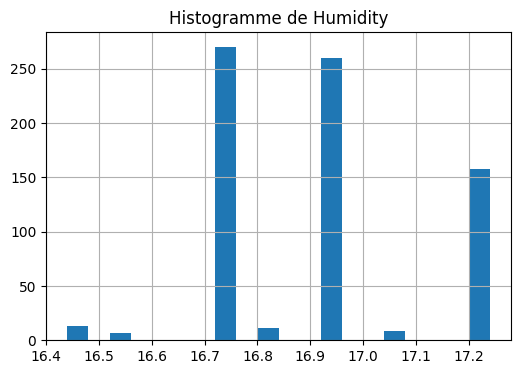

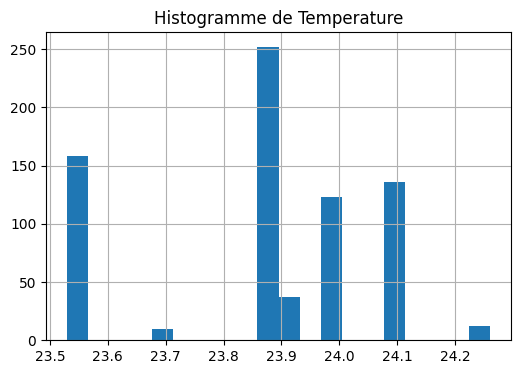

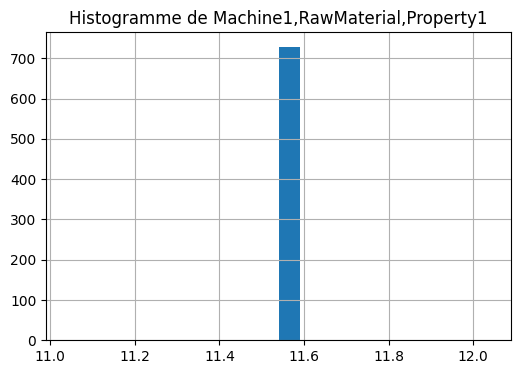

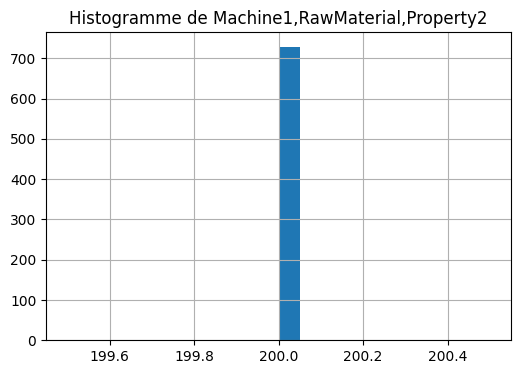

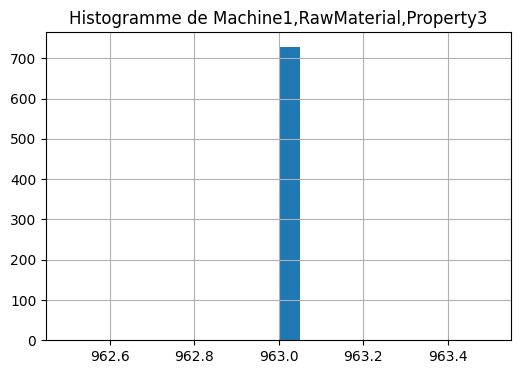

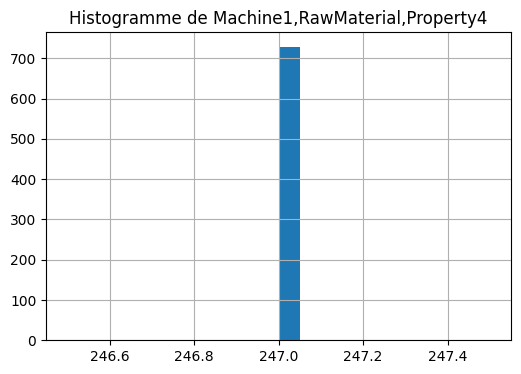

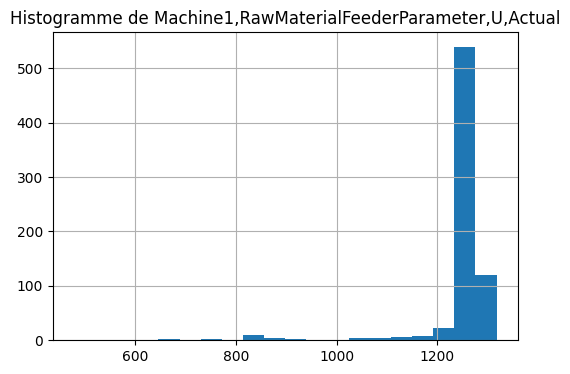

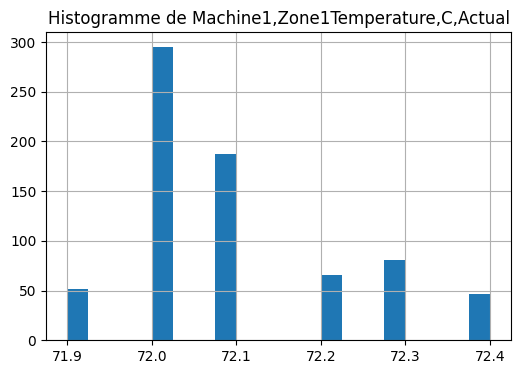

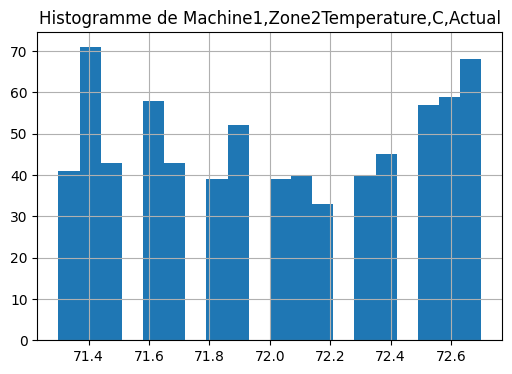

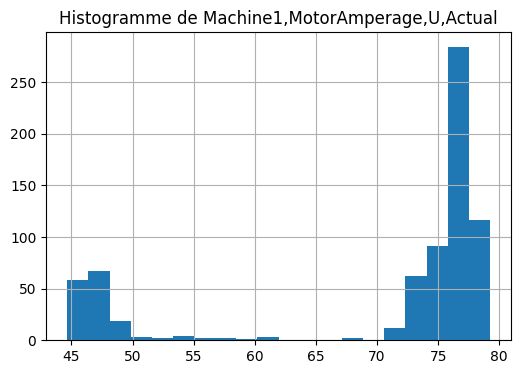

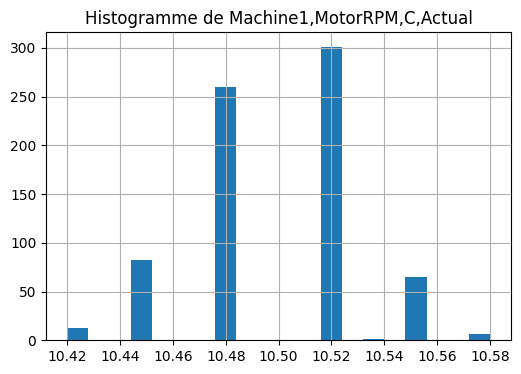

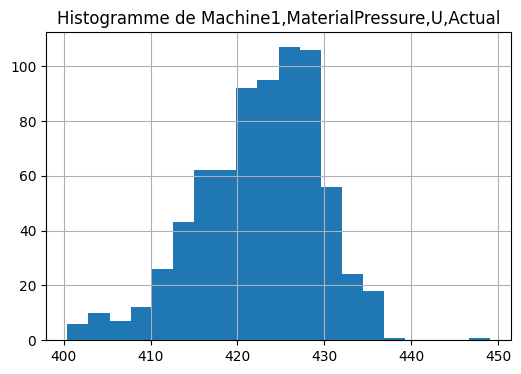

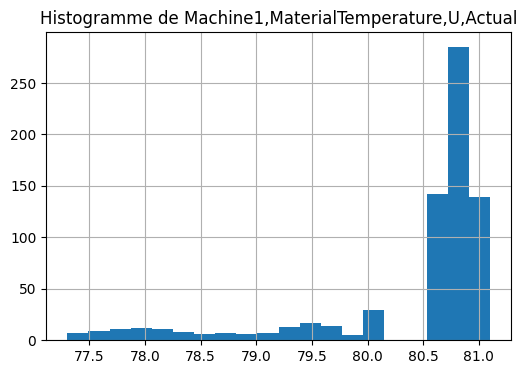

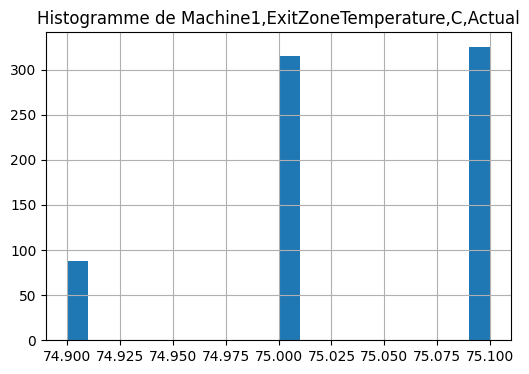

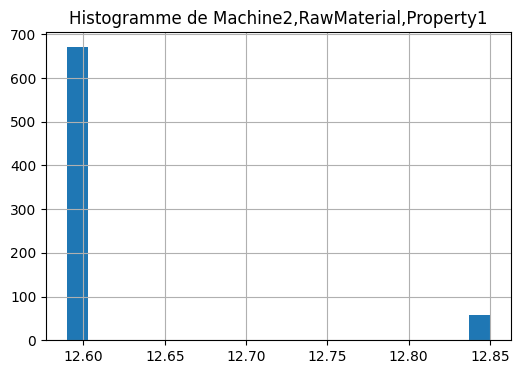

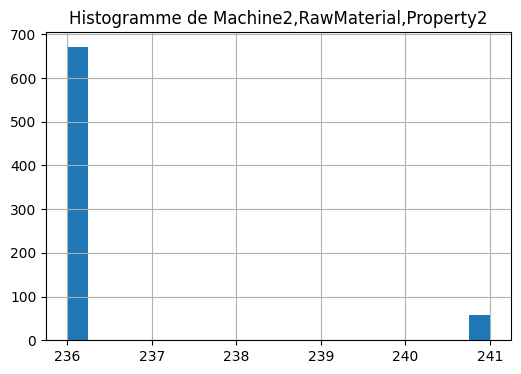

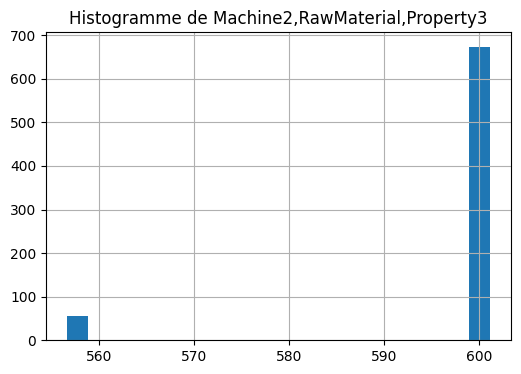

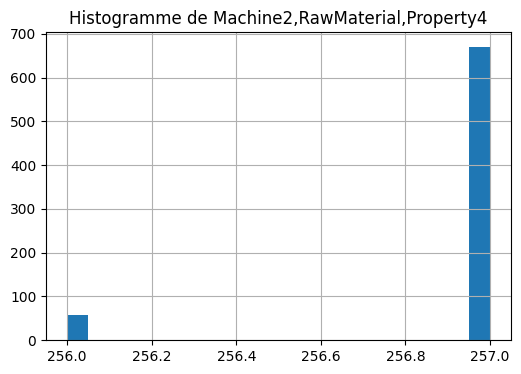

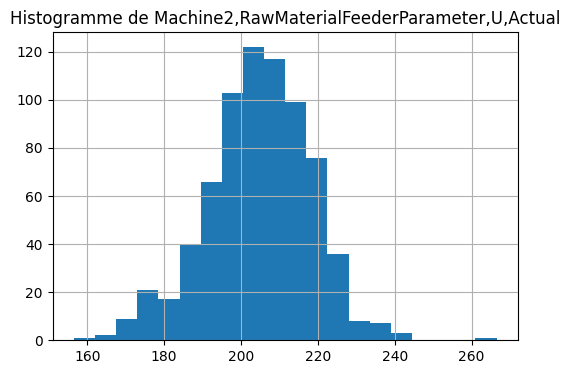

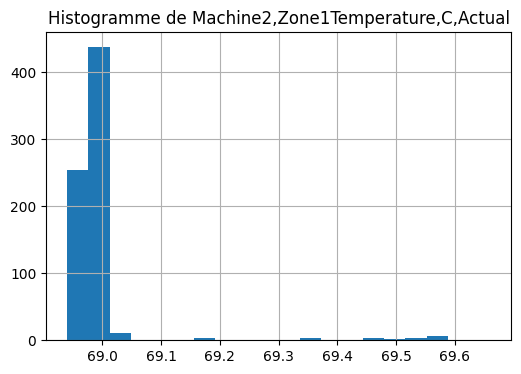

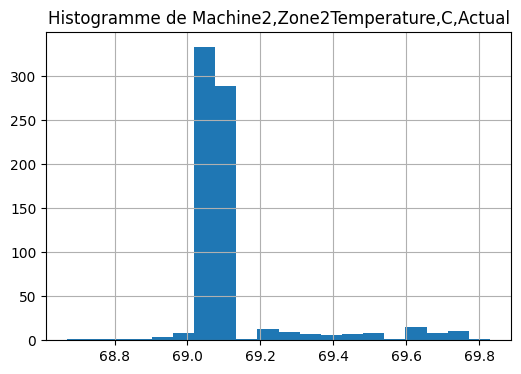

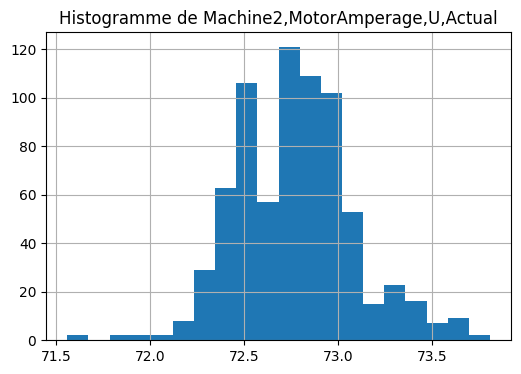

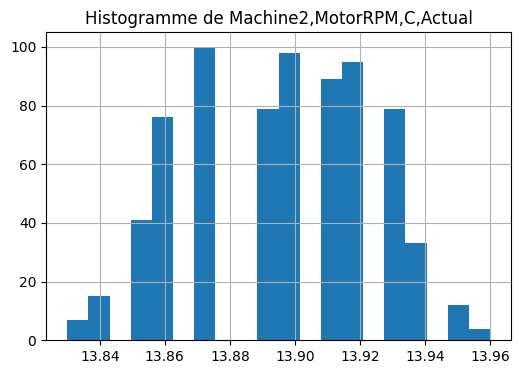

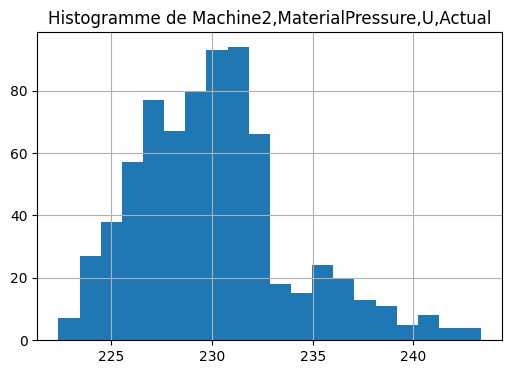

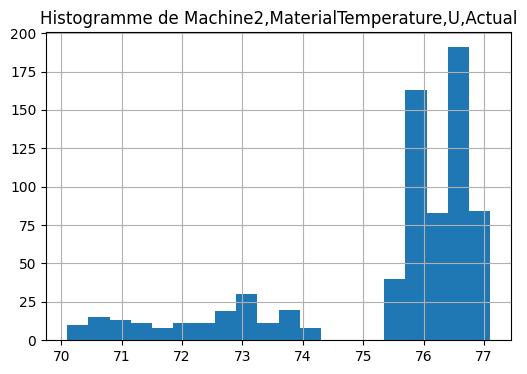

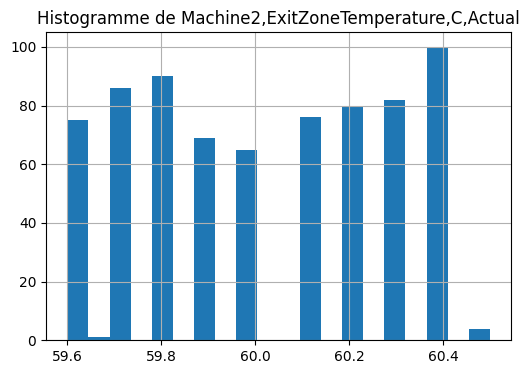

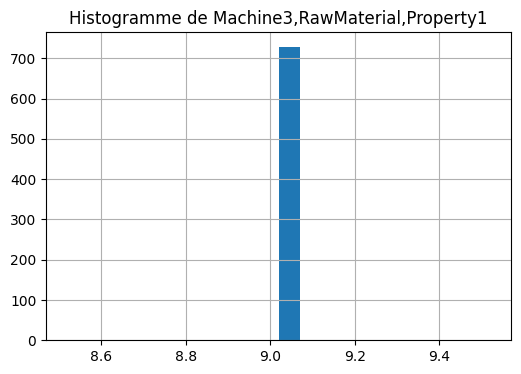

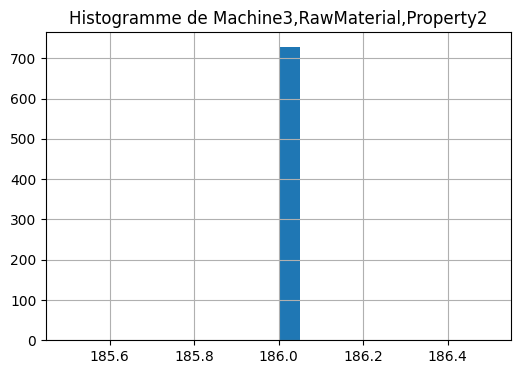

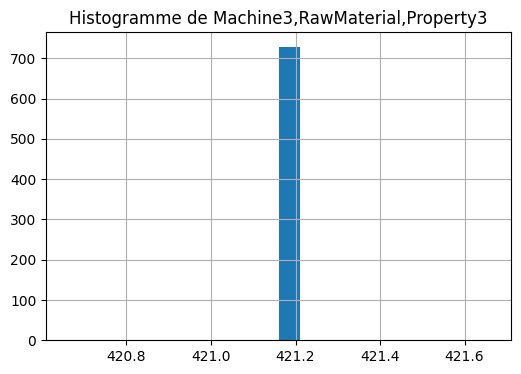

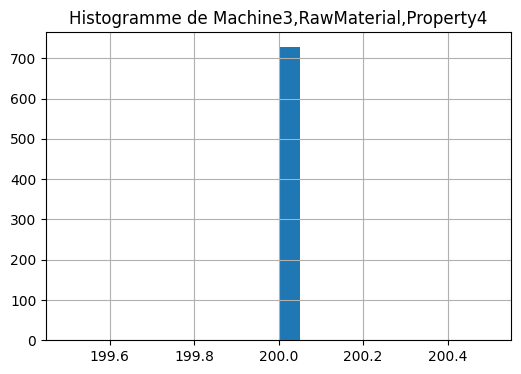

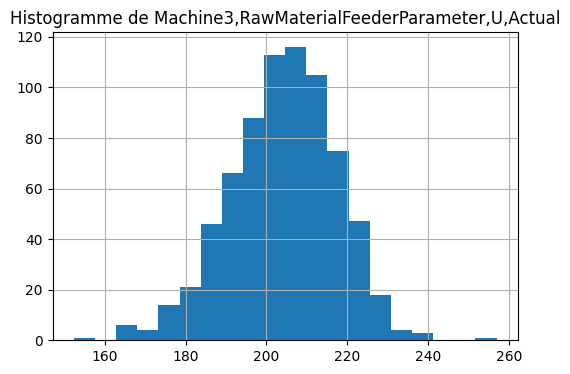

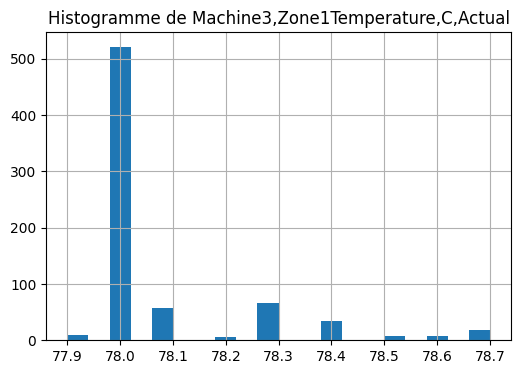

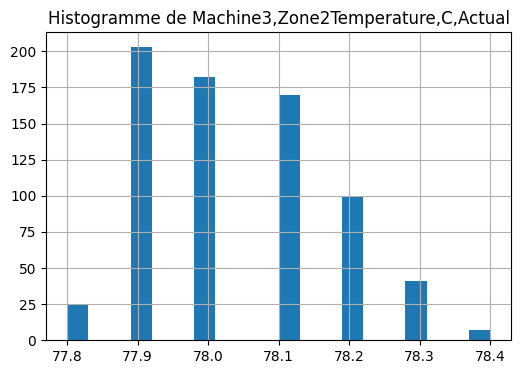

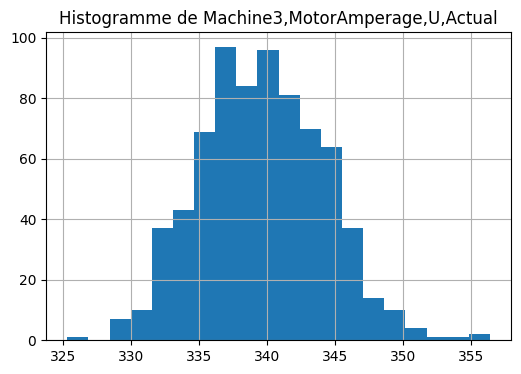

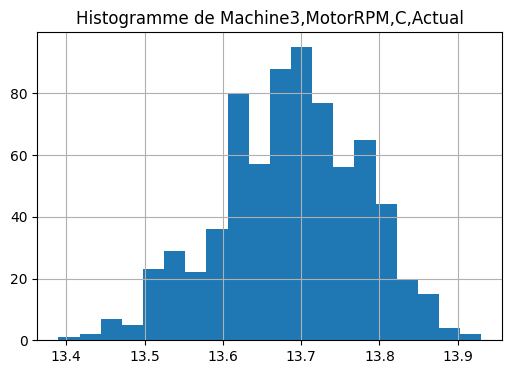

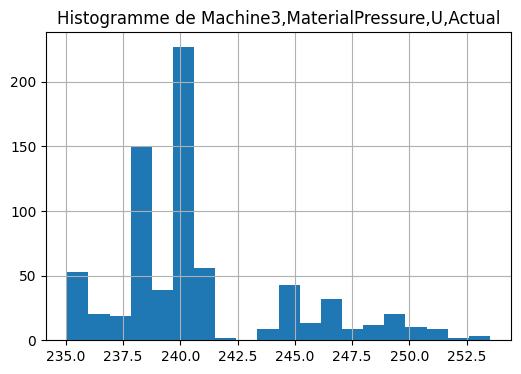

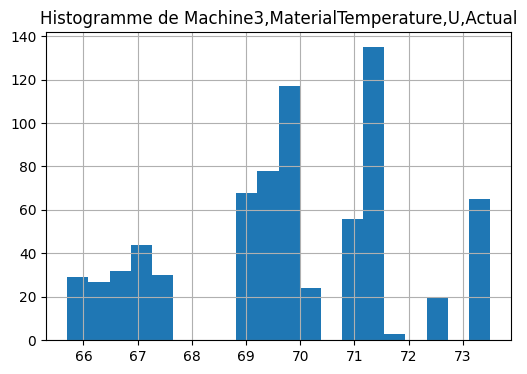

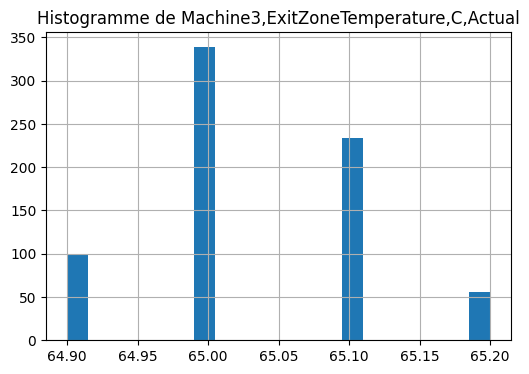

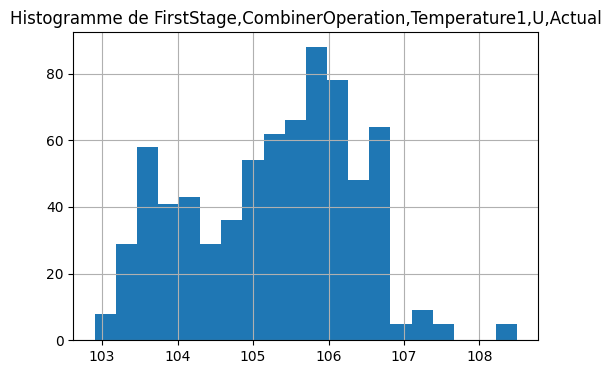

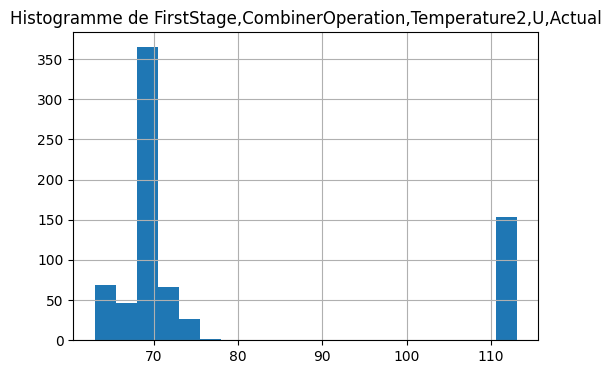

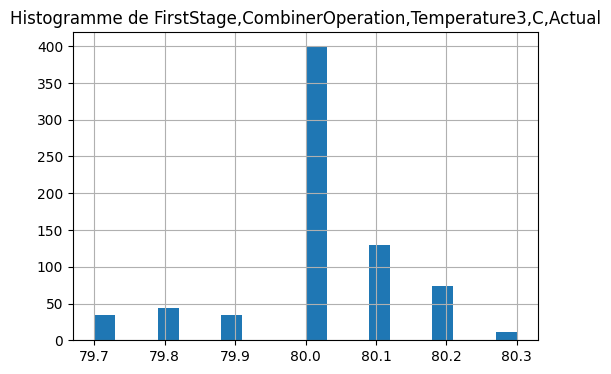

In [466]:
for col in numerical:
    plt.figure(figsize=(6,4))
    data[col].hist(bins=20)
    plt.title(f'Histogramme de {col}')
    plt.show()


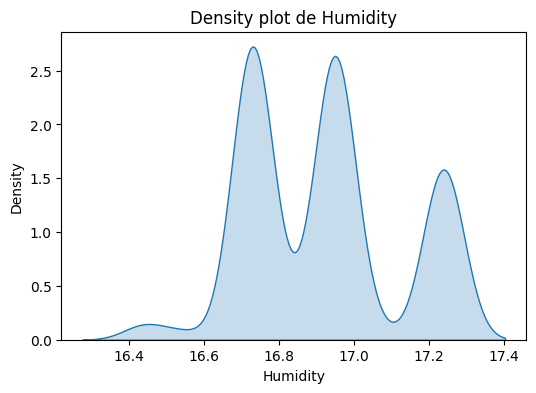

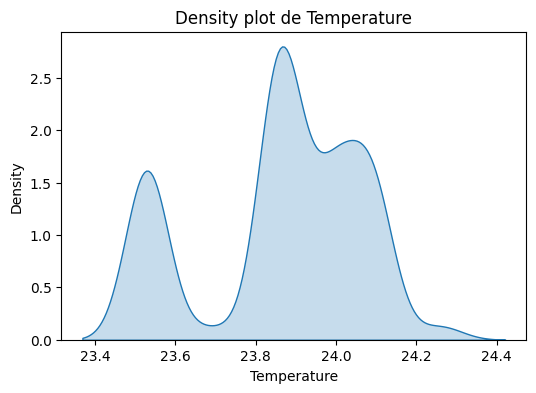

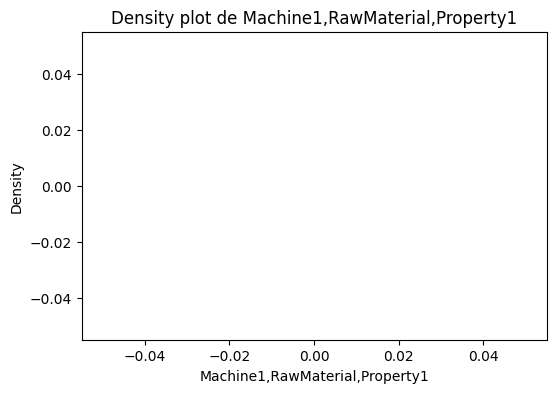

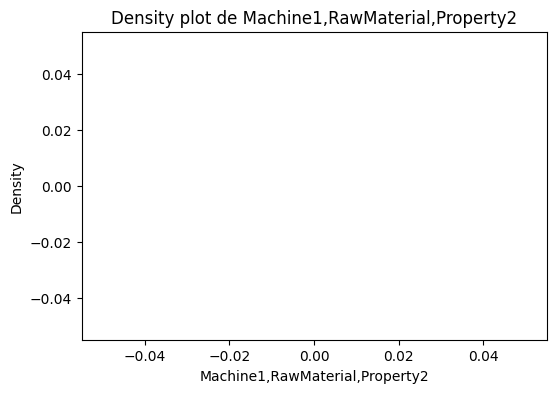

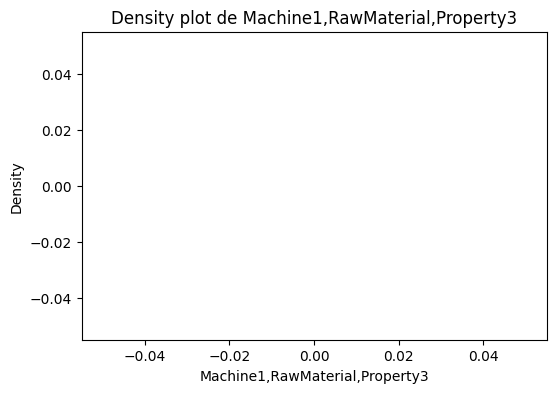

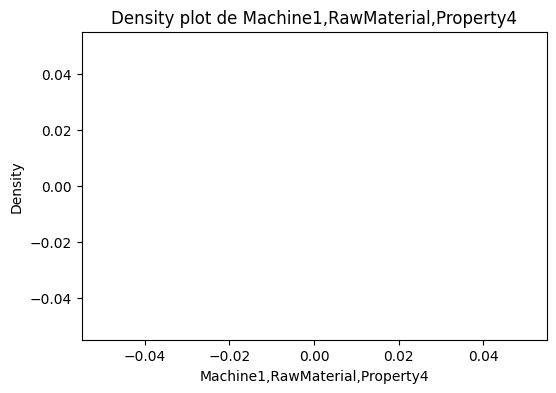

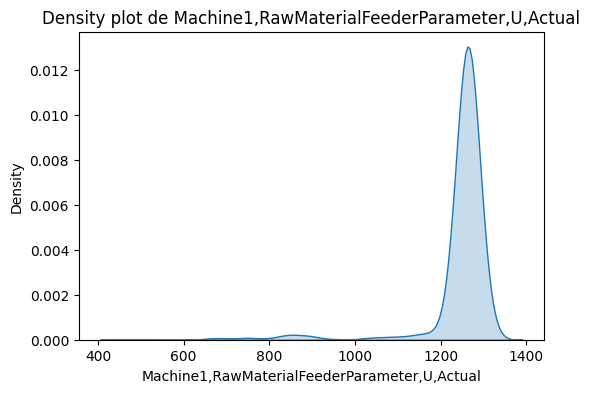

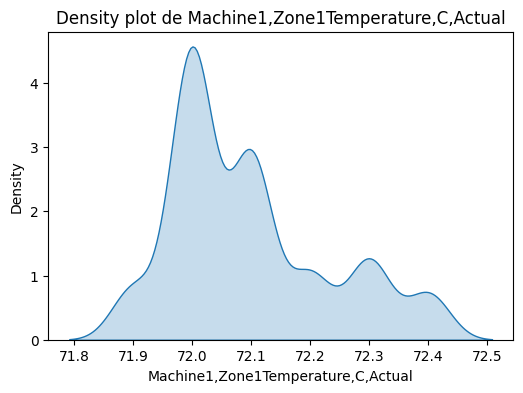

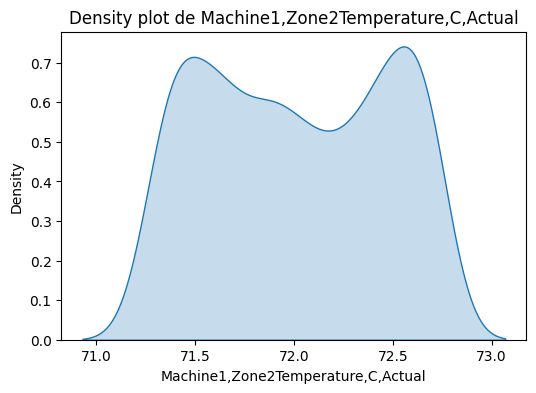

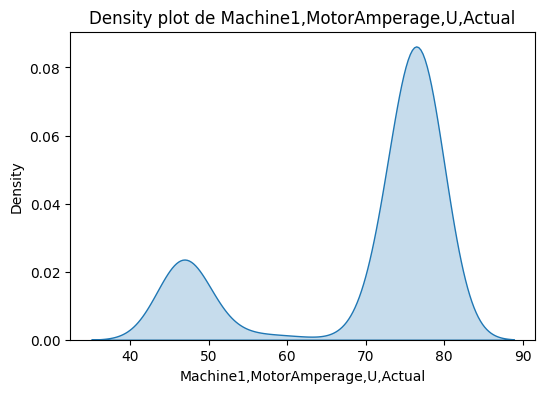

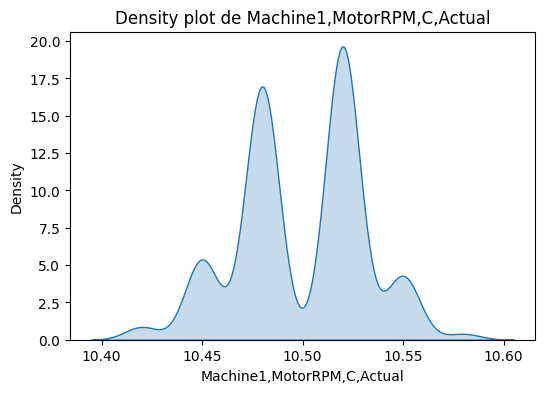

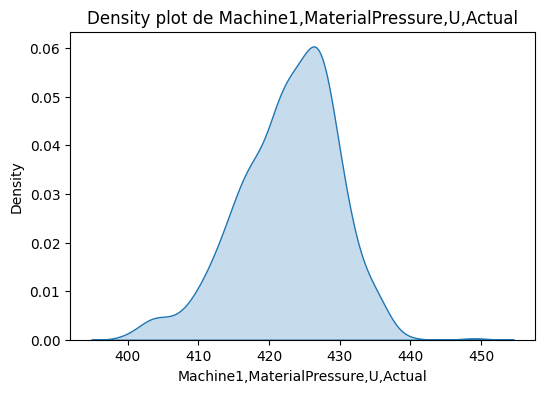

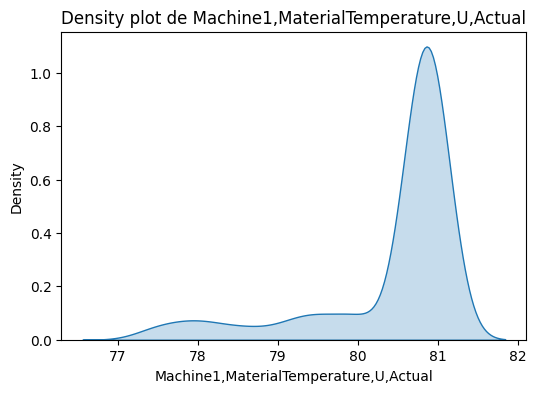

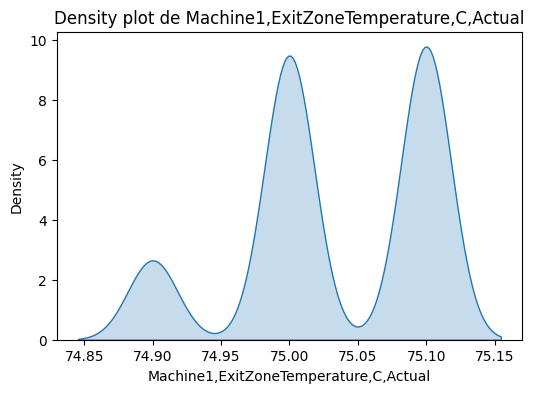

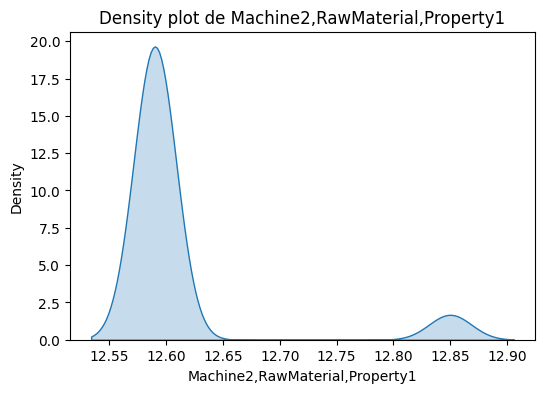

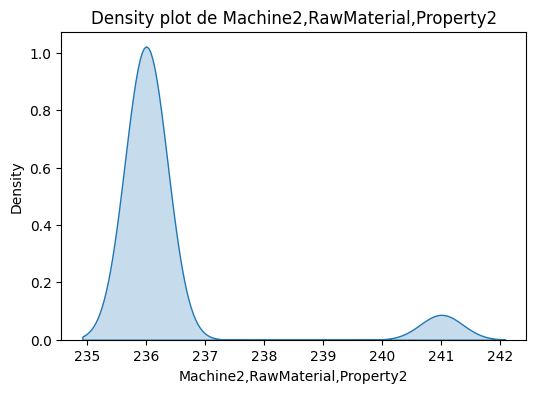

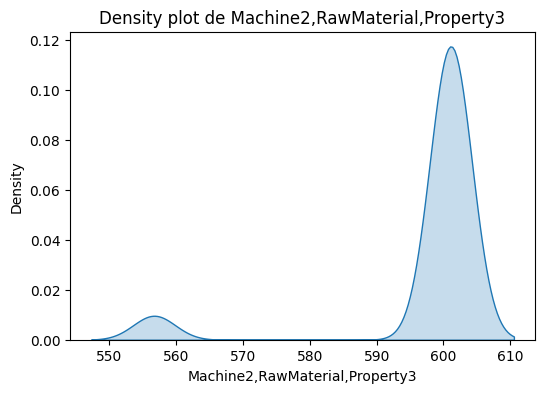

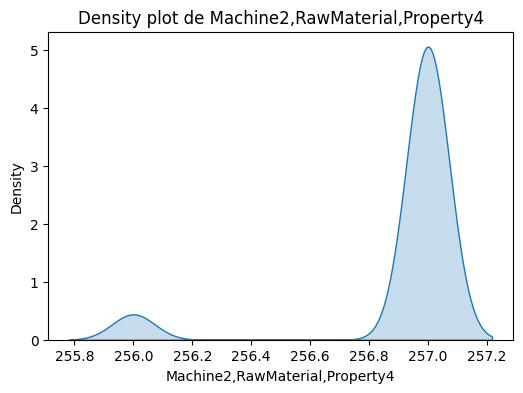

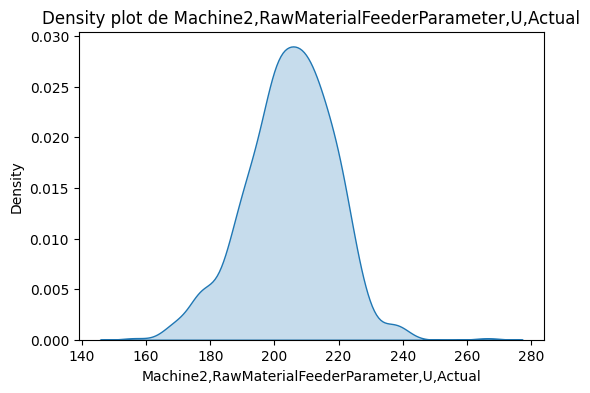

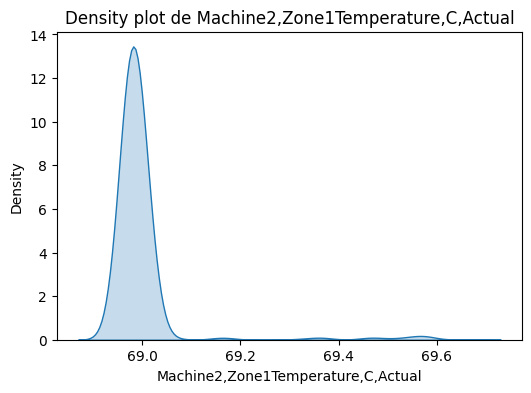

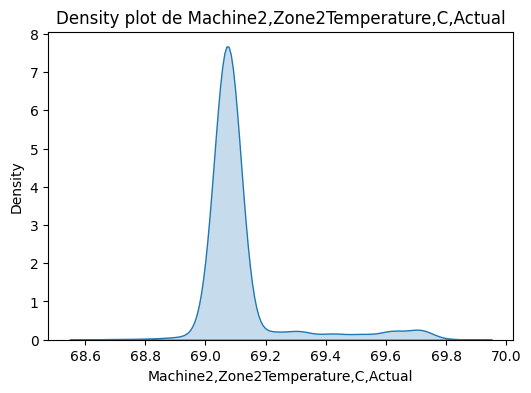

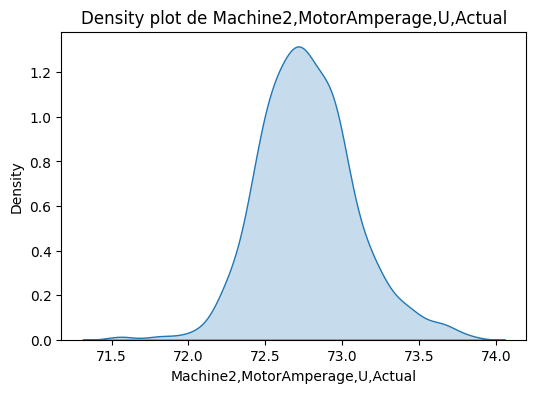

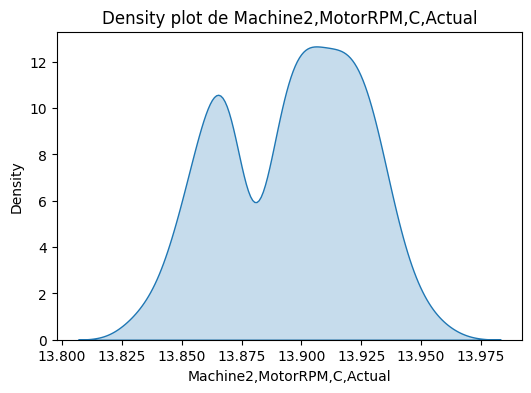

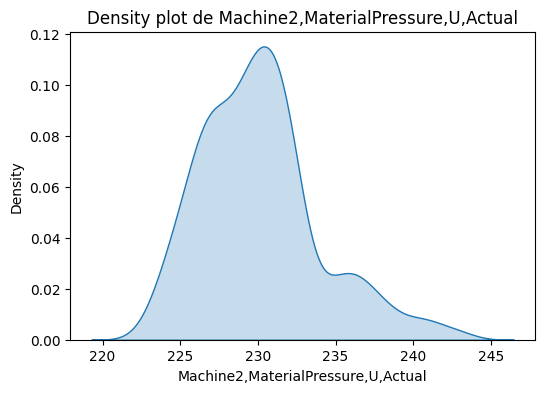

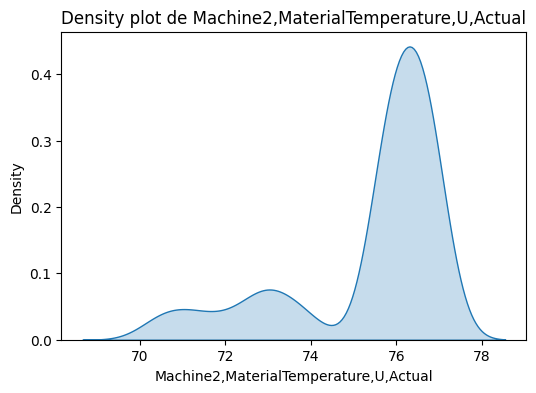

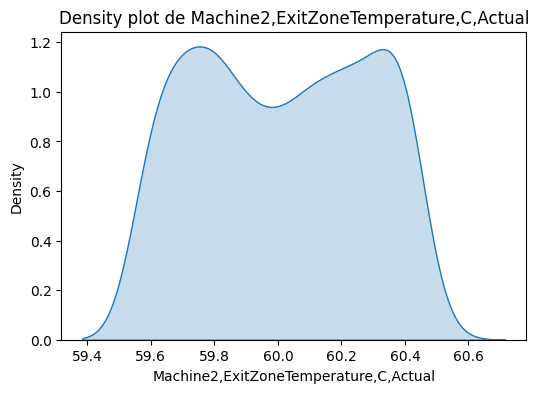

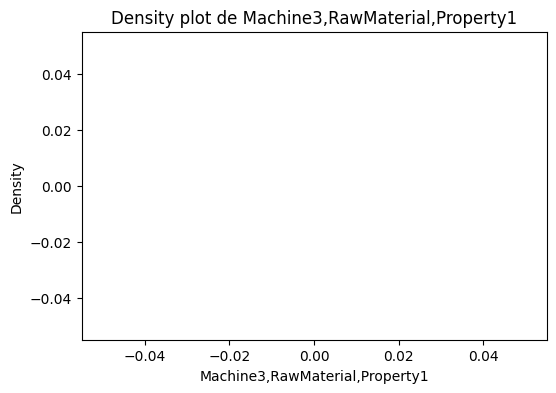

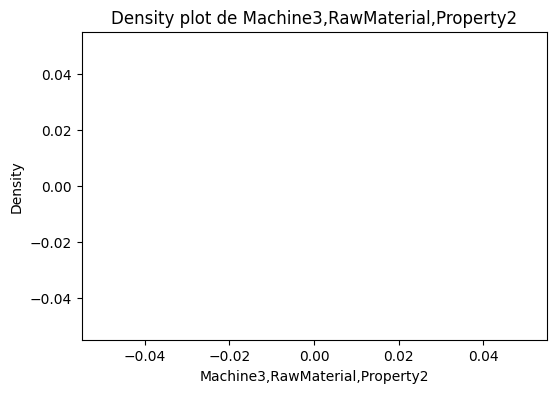

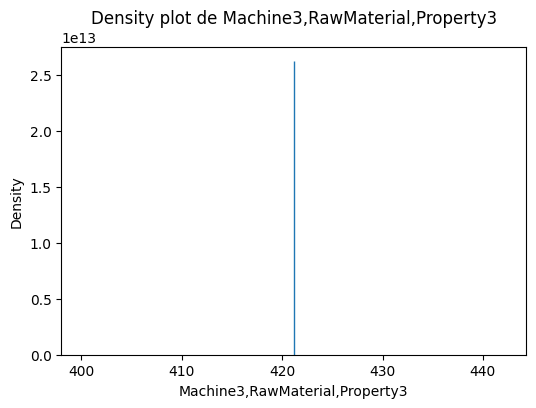

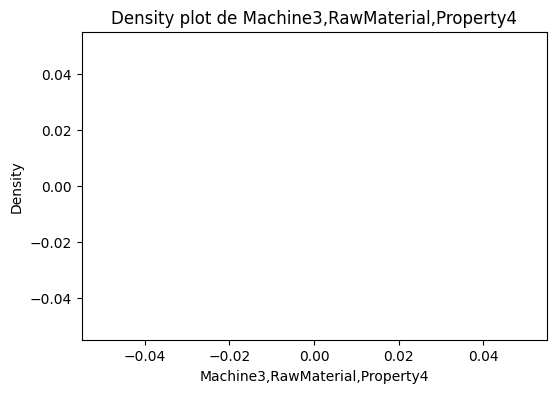

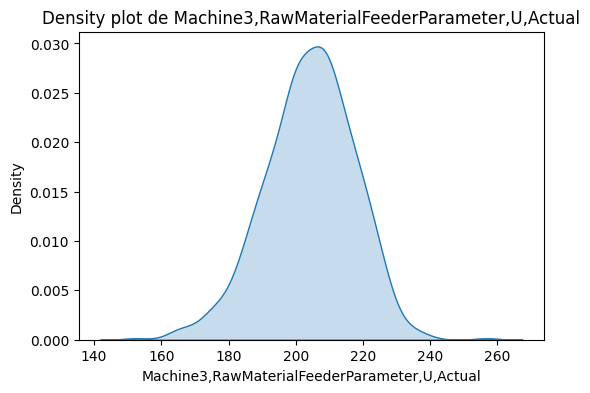

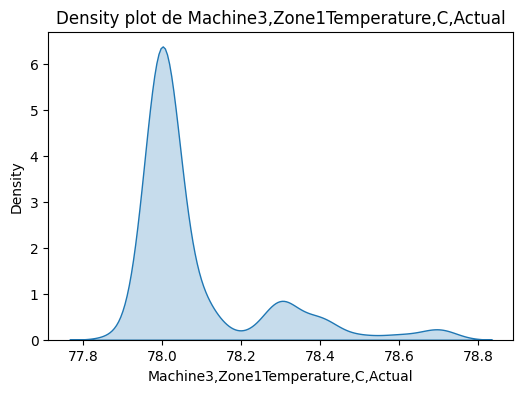

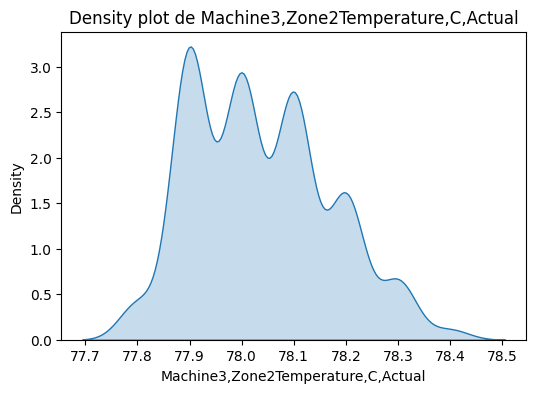

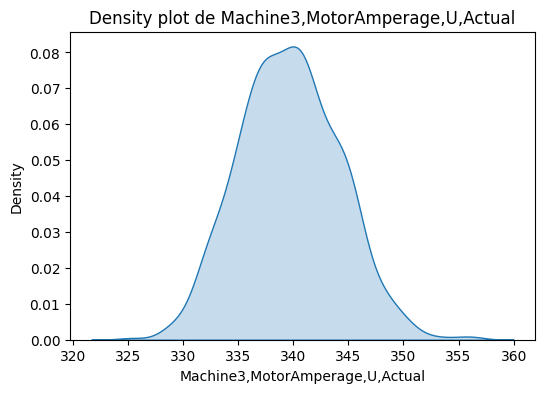

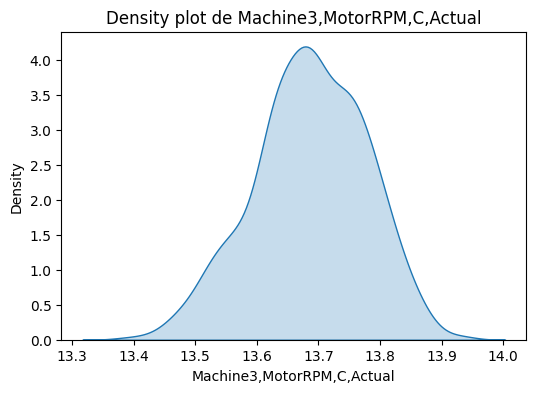

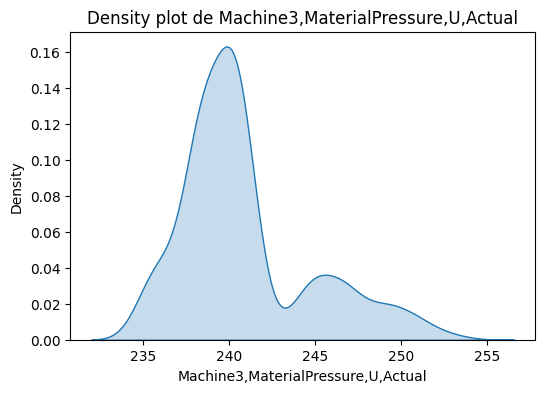

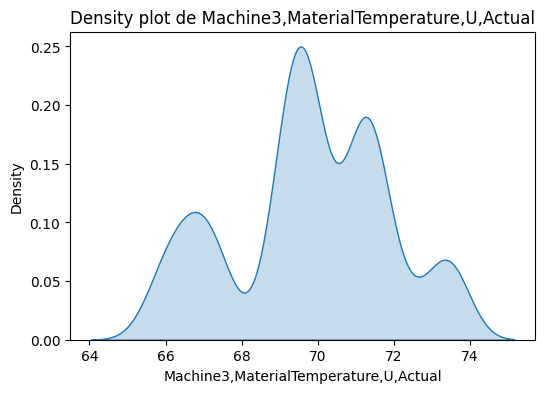

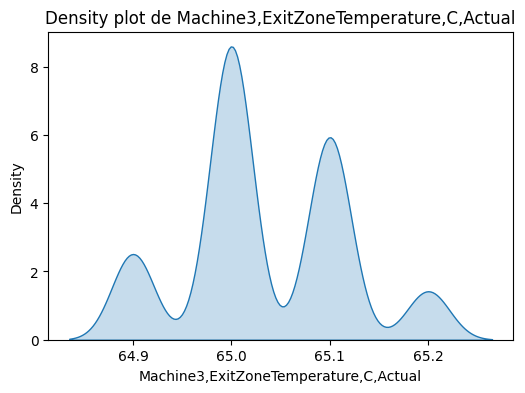

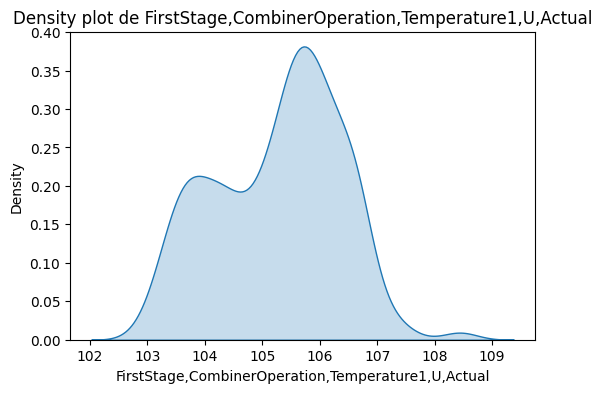

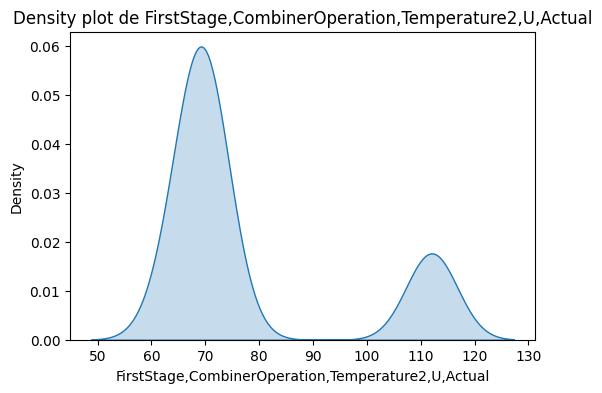

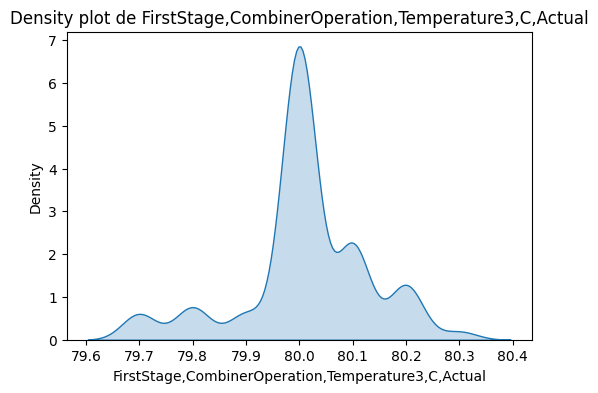

In [467]:
import seaborn as sns

for col in numerical:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data[col], fill=True, warn_singular=False)
    plt.title(f'Density plot de {col}')
    plt.show()


In [468]:
# Créer dictionnaire pour stocker la méthode choisie
impute_methods = {}

for col in numerical:
    col_skew = data[col].skew()
    # Calcul IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]
    
    # Choix de la méthode
    if abs(col_skew) < 0.5 and len(outliers) == 0:
        impute_methods[col] = 'mean'
    else:
        impute_methods[col] = 'median'

# Appliquer l’imputation
for col, method in impute_methods.items():
    imputer = SimpleImputer(strategy=method)
    data[[col]] = imputer.fit_transform(data[[col]])

print(impute_methods)

{'Humidity': 'mean', 'Temperature': 'median', 'Machine1,RawMaterial,Property1': 'mean', 'Machine1,RawMaterial,Property2': 'mean', 'Machine1,RawMaterial,Property3': 'mean', 'Machine1,RawMaterial,Property4': 'mean', 'Machine1,RawMaterialFeederParameter,U,Actual': 'median', 'Machine1,Zone1Temperature,C,Actual': 'median', 'Machine1,Zone2Temperature,C,Actual': 'mean', 'Machine1,MotorAmperage,U,Actual': 'median', 'Machine1,MotorRPM,C,Actual': 'median', 'Machine1,MaterialPressure,U,Actual': 'median', 'Machine1,MaterialTemperature,U,Actual': 'median', 'Machine1,ExitZoneTemperature,C,Actual': 'median', 'Machine2,RawMaterial,Property1': 'median', 'Machine2,RawMaterial,Property2': 'median', 'Machine2,RawMaterial,Property3': 'median', 'Machine2,RawMaterial,Property4': 'median', 'Machine2,RawMaterialFeederParameter,U,Actual': 'median', 'Machine2,Zone1Temperature,C,Actual': 'median', 'Machine2,Zone2Temperature,C,Actual': 'median', 'Machine2,MotorAmperage,U,Actual': 'median', 'Machine2,MotorRPM,C,Act

In [469]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 53 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Humidity                                            809 non-null    float64
 1   Temperature                                         809 non-null    float64
 2   Machine1,RawMaterial,Property1                      809 non-null    float64
 3   Machine1,RawMaterial,Property2                      809 non-null    float64
 4   Machine1,RawMaterial,Property3                      809 non-null    float64
 5   Machine1,RawMaterial,Property4                      809 non-null    float64
 6   Machine1,RawMaterialFeederParameter,U,Actual        809 non-null    float64
 7   Machine1,Zone1Temperature,C,Actual                  809 non-null    float64
 8   Machine1,Zone2Temperature,C,Actual                  809 non-null    float64
 9  

In [470]:
data[categorical] = data[categorical].replace({"Conform":1, "Non-conform":0})
data

C:\Users\moadh\AppData\Local\Temp\ipykernel_17932\34750449.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Humidity,Temperature,"Machine1,RawMaterial,Property1","Machine1,RawMaterial,Property2","Machine1,RawMaterial,Property3","Machine1,RawMaterial,Property4","Machine1,RawMaterialFeederParameter,U,Actual","Machine1,Zone1Temperature,C,Actual","Machine1,Zone2Temperature,C,Actual","Machine1,MotorAmperage,U,Actual",...,Conformity3,Conformity4,Conformity5,Conformity6,Conformity7,Conformity8,Conformity9,Conformity10,Conformity11,Conformity12
0,17.24,23.53,11.54,200.0,963.0,247.0,1262.58,72.3,72.700000,49.37,...,1,1,1,0,1,1,0,0,1,1
1,17.24,23.53,11.54,200.0,963.0,247.0,1134.89,72.3,72.700000,48.84,...,1,1,1,0,1,1,0,0,1,1
2,17.24,23.53,11.54,200.0,963.0,247.0,1262.58,72.3,72.700000,76.15,...,1,1,1,0,1,1,0,0,1,1
3,17.24,23.86,11.54,200.0,963.0,247.0,1246.37,72.1,72.700000,48.70,...,1,1,1,0,1,1,1,0,1,1
4,17.24,23.53,11.54,200.0,963.0,247.0,1247.26,72.1,72.700000,49.10,...,1,1,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,16.73,24.09,11.54,200.0,963.0,247.0,1262.58,72.0,72.300000,73.05,...,1,0,1,0,1,1,1,1,1,1
805,16.73,24.09,11.54,200.0,963.0,247.0,1262.58,72.0,72.300000,73.05,...,1,0,1,0,1,1,1,1,1,1
806,16.73,24.09,11.54,200.0,963.0,247.0,1257.27,72.0,72.300000,72.78,...,1,0,1,0,1,1,1,1,1,1
807,16.73,24.09,11.54,200.0,963.0,247.0,1262.36,72.1,72.014045,76.15,...,1,0,1,0,1,1,1,1,1,1


In [471]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 53 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Humidity                                            809 non-null    float64
 1   Temperature                                         809 non-null    float64
 2   Machine1,RawMaterial,Property1                      809 non-null    float64
 3   Machine1,RawMaterial,Property2                      809 non-null    float64
 4   Machine1,RawMaterial,Property3                      809 non-null    float64
 5   Machine1,RawMaterial,Property4                      809 non-null    float64
 6   Machine1,RawMaterialFeederParameter,U,Actual        809 non-null    float64
 7   Machine1,Zone1Temperature,C,Actual                  809 non-null    float64
 8   Machine1,Zone2Temperature,C,Actual                  809 non-null    float64
 9  

In [472]:
from sklearn.preprocessing import StandardScaler

# Initialiser le StandardScaler
scaler = StandardScaler()

# Ajuster et transformer les données
data_scaled = scaler.fit_transform(data[numerical])

data[numerical] = data_scaled
data

,Humidity,Temperature,"Machine1,RawMaterial,Property1","Machine1,RawMaterial,Property2","Machine1,RawMaterial,Property3","Machine1,RawMaterial,Property4","Machine1,RawMaterialFeederParameter,U,Actual","Machine1,Zone1Temperature,C,Actual","Machine1,Zone2Temperature,C,Actual","Machine1,MotorAmperage,U,Actual",...,Conformity3,Conformity4,Conformity5,Conformity6,Conformity7,Conformity8,Conformity9,Conformity10,Conformity11,Conformity12
0,1.663702,-1.750430,3.552714e-15,0.0,0.0,0.0,0.205563,1.597860,1.578266e+00,-1.835640,...,1,1,1,0,1,1,0,0,1,1
1,1.663702,-1.750430,3.552714e-15,0.0,0.0,0.0,-1.270109,1.597860,1.578266e+00,-1.881531,...,1,1,1,0,1,1,0,0,1,1
2,1.663702,-1.750430,3.552714e-15,0.0,0.0,0.0,0.205563,1.597860,1.578266e+00,0.483153,...,1,1,1,0,1,1,0,0,1,1
3,1.663702,-0.013339,3.552714e-15,0.0,0.0,0.0,0.018229,0.029087,1.578266e+00,-1.893654,...,1,1,1,0,1,1,1,0,1,1
4,1.663702,-1.750430,3.552714e-15,0.0,0.0,0.0,0.028515,0.029087,1.578266e+00,-1.859019,...,1,1,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,-0.968053,1.197362,3.552714e-15,0.0,0.0,0.0,0.205563,-0.755299,6.579343e-01,0.214734,...,1,0,1,0,1,1,1,1,1,1
805,-0.968053,1.197362,3.552714e-15,0.0,0.0,0.0,0.205563,-0.755299,6.579343e-01,0.214734,...,1,0,1,0,1,1,1,1,1,1
806,-0.968053,1.197362,3.552714e-15,0.0,0.0,0.0,0.144197,-0.755299,6.579343e-01,0.191356,...,1,0,1,0,1,1,1,1,1,1
807,-0.968053,1.197362,3.552714e-15,0.0,0.0,0.0,0.203021,0.029087,-3.269676e-14,0.483153,...,1,0,1,0,1,1,1,1,1,1


In [473]:
import plotly.express as px

fig = px.imshow(data[numerical].corr(), width=1500, height=1500, text_auto=True, color_continuous_scale="RdYlGn")
fig.show()


In [474]:
M_corr = data[numerical].corr()
corr_pairs = M_corr.unstack().reset_index()
corr_pairs.columns = ["col1","col2","r"]
corr_pairs = corr_pairs[corr_pairs["col1"]<corr_pairs["col2"]]
corr_pairs = corr_pairs.reindex(corr_pairs["r"].abs().sort_values(ascending=False).index)

# seuil de corrélation
seuil = 0.7

# colonnes à supprimer
colonnes_supprimer = set()
for _, row in corr_pairs.iterrows():
    if abs(row["r"]) > seuil:
        # supprimer arbitrairement la deuxième colonne
        colonnes_supprimer.add(row["col2"])

# supprimer aussi les colonnes de variance nulle (non calculable)
colonnes_supprimer.update([col for col in numerical if data[col].var() == 0])

# DataFrame filtré
data_filtre = data.drop(columns=colonnes_supprimer)

# Supprimer les colonnes supprimées de la liste numerical
numerical = [col for col in numerical if col not in colonnes_supprimer]

# Affichage des résultats
print("Colonnes supprimées car corrélée :",len(colonnes_supprimer), colonnes_supprimer)

data_filtre

Colonnes supprimées car corrélée : 18 {'Machine3,MaterialTemperature,U,Actual', 'Humidity', 'Machine2,MaterialPressure,U,Actual', 'Temperature', 'Machine1,MotorAmperage,U,Actual', 'Machine2,RawMaterial,Property3', 'Machine1,MaterialTemperature,U,Actual', 'Machine2,RawMaterial,Property2', 'Machine1,RawMaterial,Property3', 'Machine2,RawMaterial,Property4', 'Machine1,RawMaterial,Property1', 'Machine3,RawMaterial,Property2', 'Machine3,RawMaterial,Property4', 'Machine3,Zone1Temperature,C,Actual', 'Machine1,RawMaterial,Property2', 'Machine3,MaterialPressure,U,Actual', 'Machine2,MaterialTemperature,U,Actual', 'Machine1,RawMaterial,Property4'}


,"Machine1,RawMaterialFeederParameter,U,Actual","Machine1,Zone1Temperature,C,Actual","Machine1,Zone2Temperature,C,Actual","Machine1,MotorRPM,C,Actual","Machine1,MaterialPressure,U,Actual","Machine1,ExitZoneTemperature,C,Actual","Machine2,RawMaterial,Property1","Machine2,RawMaterialFeederParameter,U,Actual","Machine2,Zone1Temperature,C,Actual","Machine2,Zone2Temperature,C,Actual",...,Conformity3,Conformity4,Conformity5,Conformity6,Conformity7,Conformity8,Conformity9,Conformity10,Conformity11,Conformity12
0,0.205563,1.597860,1.578266e+00,0.615365,1.267260,1.084961,-0.275314,0.929838,0.158731,4.911201,...,1,1,1,0,1,1,0,0,1,1
1,-1.270109,1.597860,1.578266e+00,0.615365,0.784353,1.084961,-0.275314,0.028228,-0.202414,3.949355,...,1,1,1,0,1,1,0,0,1,1
2,0.205563,1.597860,1.578266e+00,-0.702106,1.659338,1.084961,-0.275314,-0.446487,-0.202414,4.155465,...,1,1,1,0,1,1,0,0,1,1
3,0.018229,0.029087,1.578266e+00,-1.690209,1.221845,1.084961,-0.275314,-0.821283,-0.322796,4.155465,...,1,1,1,0,1,1,1,0,1,1
4,0.028515,0.029087,1.578266e+00,0.615365,2.502534,1.084961,-0.275314,1.980355,-0.322796,4.086762,...,1,1,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,0.205563,-0.755299,6.579343e-01,0.615365,-1.875422,-0.449538,3.632215,0.639021,0.158731,-0.241542,...,1,0,1,0,1,1,1,1,1,1
805,0.205563,-0.755299,6.579343e-01,-0.702106,-0.690104,-0.449538,3.632215,1.288304,0.038349,-0.172839,...,1,0,1,0,1,1,1,1,1,1
806,0.144197,-0.755299,6.579343e-01,-0.702106,-1.851201,-0.449538,3.632215,0.028228,0.038349,-0.241542,...,1,0,1,0,1,1,1,1,1,1
807,0.203021,0.029087,-3.269676e-14,0.615365,-0.989840,-0.449538,3.632215,0.492835,0.158731,-0.172839,...,1,0,1,0,1,1,1,1,1,1


In [475]:
from scipy.stats import chi2_contingency

to_drop = set()
seuil = 0.95
categorical = [col for col in categorical if data[col].value_counts(normalize=True).max() <= seuil]
print("Colonnes catégorielles conservées (moins de 95% d'une même modalité) :", categorical)
pval_matrix = pd.DataFrame(index=categorical, columns=categorical)

# Boucle sur chaque paire de colonnes
for i in range(len(categorical)):
    for j in range(i + 1, len(categorical)):
        col1 = categorical[i]
        col2 = categorical[j]

        # Tableau de contingence
        contingency = pd.crosstab(data[col1], data[col2])

        # Test Khi²
        chi2, p, dof, expected = chi2_contingency(contingency)

        pval_matrix.loc[col1, col2] = p
 
        # Si l’une des colonnes a déjà été supprimée, ignorer
        if col1 in to_drop or col2 in to_drop:
            continue

        # Si dépendance significative, supprimer col2
        if p < 0.05:
            # Calculer la variance de chaque colonne
            var1 = data[col1].var()
            var2 = data[col2].var()

            # Supprimer la colonne avec la plus petite variance
            if var1 >= var2:
                to_drop.add(col2)
            else:
                to_drop.add(col1)

# Supprimer les colonnes supprimées de la liste numerical
categorical = [col for col in categorical if col not in to_drop]

# Créer un nouveau DataFrame filtré

col = list(numerical) + list(categorical)
data_filtre = data_filtre[col]

# Affichage des résultats
print("Colonnes filtrée indépendantes :", categorical)

# Convertir en float
pval_matrix = pval_matrix.astype(float)

# Heatmap interactive avec Plotly
fig = px.imshow(pval_matrix, width=800, height=800, text_auto=".2f", color_continuous_scale=["red", "yellow", "green"], title="Dépendance entre variables catégorielles (p-values Khi²)")


fig.update_layout(xaxis_title="Variables", yaxis_title="Variables")
fig.show()

data_filtre


Colonnes catégorielles conservées (moins de 95% d'une même modalité) : ['Conformity1 ', 'Conformity2', 'Conformity4', 'Conformity9', 'Conformity10']
Colonnes filtrée indépendantes : ['Conformity2', 'Conformity4']


,"Machine1,RawMaterialFeederParameter,U,Actual","Machine1,Zone1Temperature,C,Actual","Machine1,Zone2Temperature,C,Actual","Machine1,MotorRPM,C,Actual","Machine1,MaterialPressure,U,Actual","Machine1,ExitZoneTemperature,C,Actual","Machine2,RawMaterial,Property1","Machine2,RawMaterialFeederParameter,U,Actual","Machine2,Zone1Temperature,C,Actual","Machine2,Zone2Temperature,C,Actual",...,"Machine3,RawMaterialFeederParameter,U,Actual","Machine3,Zone2Temperature,C,Actual","Machine3,MotorAmperage,U,Actual","Machine3,MotorRPM,C,Actual","Machine3,ExitZoneTemperature,C,Actual","FirstStage,CombinerOperation,Temperature1,U,Actual","FirstStage,CombinerOperation,Temperature2,U,Actual","FirstStage,CombinerOperation,Temperature3,C,Actual",Conformity2,Conformity4
0,0.205563,1.597860,1.578266e+00,0.615365,1.267260,1.084961,-0.275314,0.929838,0.158731,4.911201,...,-0.086493,2.133985,2.562095,1.082565,8.639077e-01,-2.084223,2.029671,-0.089325,1,1
1,-1.270109,1.597860,1.578266e+00,0.615365,0.784353,1.084961,-0.275314,0.028228,-0.202414,3.949355,...,2.393690,2.133985,0.692710,0.040252,-1.858120e-13,-2.084223,2.000160,-0.089325,1,1
2,0.205563,1.597860,1.578266e+00,-0.702106,1.659338,1.084961,-0.275314,-0.446487,-0.202414,4.155465,...,0.838415,2.133985,-1.227956,-1.812750,8.639077e-01,-2.084223,2.023769,-0.089325,1,1
3,0.018229,0.029087,1.578266e+00,-1.690209,1.221845,1.084961,-0.275314,-0.821283,-0.322796,4.155465,...,-0.789899,-0.264943,1.268443,-0.770437,8.639077e-01,-1.795534,2.041476,-0.089325,1,1
4,0.028515,0.029087,1.578266e+00,0.615365,2.502534,1.084961,-0.275314,1.980355,-0.322796,4.086762,...,-0.604124,2.133985,0.415332,-2.507626,8.639077e-01,-1.795534,2.029671,-0.089325,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,0.205563,-0.755299,6.579343e-01,0.615365,-1.875422,-0.449538,3.632215,0.639021,0.158731,-0.241542,...,-2.318975,0.534700,-0.661546,0.735127,-4.436278e-01,-1.506844,-0.809306,-0.089325,1,0
805,0.205563,-0.755299,6.579343e-01,-0.702106,-0.690104,-0.449538,3.632215,1.288304,0.038349,-0.172839,...,-0.825625,0.534700,-1.190661,-2.160188,-4.436278e-01,-1.506844,-0.791599,-0.089325,1,0
806,0.144197,-0.755299,6.579343e-01,-0.702106,-1.851201,-0.449538,3.632215,0.028228,0.038349,-0.241542,...,-1.475840,0.534700,-0.862004,0.156064,-4.436278e-01,-1.506844,-0.815208,-0.089325,1,0
807,0.203021,0.029087,-3.269676e-14,0.615365,-0.989840,-0.449538,3.632215,0.492835,0.158731,-0.172839,...,-0.747028,0.534700,-1.057800,-0.075561,-4.436278e-01,-1.603074,-0.797501,-0.089325,1,0


In [480]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_scores = pd.DataFrame(index=numerical, columns=categorical)

for col_target in categorical:
    y = data_filtre[col_target]
    X = data_filtre[numerical]
    
    # Calcul de l'information mutuelle
    mi = mutual_info_classif(X, y, discrete_features=False, random_state=42)
    
    mutual_info_scores[col_target] = mi

# Afficher les scores
mutual_info_scores = mutual_info_scores.astype(float)
print(mutual_info_scores.sort_values(by=categorical[0], ascending=False))

fig = px.bar(mutual_info_scores.reset_index().melt(id_vars='index'),width=1200, height=600, x='index', y='value', color='variable', barmode='group', title="Information Mutuelle entre variables quantitatives et cibles qualitatives")
fig.show()


                                                    Conformity2  Conformity4
FirstStage,CombinerOperation,Temperature2,U,Actual     0.523356     0.044409
FirstStage,CombinerOperation,Temperature1,U,Actual     0.491537     0.062023
Machine1,MaterialPressure,U,Actual                     0.188625     0.026375
Machine1,RawMaterialFeederParameter,U,Actual           0.177264     0.007707
Machine1,Zone1Temperature,C,Actual                     0.153462     0.038039
Machine2,MotorAmperage,U,Actual                        0.113294     0.023704
Machine3,ExitZoneTemperature,C,Actual                  0.105320     0.025197
Machine2,Zone2Temperature,C,Actual                     0.097823     0.000000
Machine1,ExitZoneTemperature,C,Actual                  0.089340     0.025159
Machine2,RawMaterialFeederParameter,U,Actual           0.076690     0.004161
Machine2,RawMaterial,Property1                         0.076534     0.023356
FirstStage,CombinerOperation,Temperature3,C,Actual     0.074463     0.019087